In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [2]:
import itertools
# 相当多的算法
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#调整子图位置大小
import warnings

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

#stacking利器：
#绘制学习曲线
from mlxtend.plotting import plot_learning_curves
#画出logistic模型决策边界
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")

In [4]:
cols = ['tip','total_bill', 'sex', 'smoker', 'day', 'time','size']
tips_sub = pd.get_dummies(tips[cols].dropna(), drop_first=True)

X = tips_sub.drop('tip', axis=1)
y = tips_sub.tip

In [5]:
tips_sub

,tip,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.01,16.99,2,1,1,0,0,1,1
1,1.66,10.34,3,0,1,0,0,1,1
2,3.50,21.01,3,0,1,0,0,1,1
3,3.31,23.68,2,0,1,0,0,1,1
4,3.61,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,5.92,29.03,3,0,1,0,1,0,1
240,2.00,27.18,2,1,0,0,1,0,1
241,2.00,22.67,2,0,0,0,1,0,1
242,1.75,17.82,2,0,1,0,1,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11193) # test的数量占总体的0.2

In [7]:
print(X_train)

     total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
35        24.06     3           0          1        0        1        0   
128       11.38     2           1          1        0        0        0   
37        16.93     3           1          1        0        1        0   
174       16.82     2           0          0        0        0        1   
5         25.29     4           0          1        0        0        1   
..          ...   ...         ...        ...      ...      ...      ...   
162       16.21     3           1          1        0        0        1   
33        20.69     4           1          1        0        1        0   
209       12.76     2           1          0        0        1        0   
4         24.59     4           1          1        0        0        1   
145        8.35     2           1          1        0        0        0   

     time_Dinner  
35             1  
128            0  
37             1  
174            1  
5   

In [8]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
print(X_train)
print(X_test)

[[ 5.23840631e-01  4.57560114e-01 -8.05387266e-01  6.98430296e-01
  -2.82216261e-01  1.40556386e+00 -7.11458249e-01  6.21581561e-01]
 [-9.22276224e-01 -5.95691469e-01  1.24163870e+00  6.98430296e-01
  -2.82216261e-01 -7.11458249e-01 -7.11458249e-01 -1.60879933e+00]
 [-2.89314983e-01  4.57560114e-01  1.24163870e+00  6.98430296e-01
  -2.82216261e-01  1.40556386e+00 -7.11458249e-01  6.21581561e-01]
 [-3.01860160e-01 -5.95691469e-01 -8.05387266e-01 -1.43178211e+00
  -2.82216261e-01 -7.11458249e-01  1.40556386e+00  6.21581561e-01]
 [ 6.64118527e-01  1.51081170e+00 -8.05387266e-01  6.98430296e-01
  -2.82216261e-01 -7.11458249e-01  1.40556386e+00  6.21581561e-01]
 [-6.45141843e-01 -5.95691469e-01 -8.05387266e-01  6.98430296e-01
  -2.82216261e-01 -7.11458249e-01  1.40556386e+00  6.21581561e-01]
 [-9.46226109e-01 -5.95691469e-01  1.24163870e+00  6.98430296e-01
  -2.82216261e-01 -7.11458249e-01 -7.11458249e-01 -1.60879933e+00]
 [-3.41776635e-01  4.57560114e-01  1.24163870e+00 -1.43178211e+00
  -

In [10]:
print(y_train)
print(y_test)

35     3.60
128    2.00
37     3.07
174    4.00
5      4.71
       ... 
162    2.00
33     2.45
209    2.23
4      3.61
145    1.50
Name: tip, Length: 122, dtype: float64
216    3.00
191    4.19
73     5.00
72     3.14
173    3.18
       ... 
183    6.50
185    5.00
200    4.00
148    1.73
241    2.00
Name: tip, Length: 122, dtype: float64


In [11]:

# scale y
y_train_copy = y_train

def y_scaler(y):
    y_stdev = np.std(y_train_copy)
    y_mean = np.mean(y_train_copy)
    y_new = (y - y_mean)/y_stdev # 把y也scale了
    
    return y_new


y_train = y_scaler(y_train)
y_test = y_scaler(y_test)
print(y_train)
print(y_test)


35     0.369857
128   -0.843930
37    -0.032210
174    0.673304
5      1.211922
         ...   
162   -0.843930
33    -0.502553
209   -0.669448
4      0.377443
145   -1.223239
Name: tip, Length: 122, dtype: float64
216   -0.085313
191    0.817441
73     1.431921
72     0.020893
173    0.051238
         ...   
183    2.569846
185    1.431921
200    0.673304
148   -1.048757
241   -0.843930
Name: tip, Length: 122, dtype: float64


In [12]:
w_ = np.random.normal(loc = 0, scale = 0.01, size = X_train.shape[1]+1)
# X_train[:,0] = 1  # 3排的矩阵，第一列全是1
# X_test[:,0] = 1  # 3排的矩阵，第一列全是1
e_ = y_train-(w_[0] + X_train.dot(w_[1:]))
lRMSE = np.log(np.sqrt((e_**2).mean())) # log MSE

print(e_)
print()
print(lRMSE)

35     0.409589
128   -0.835458
37     0.022096
174    0.653711
5      1.211901
         ...   
162   -0.822450
33    -0.454085
209   -0.640229
4      0.395864
145   -1.216589
Name: tip, Length: 122, dtype: float64

0.0003141769392487017


In [13]:
w = np.zeros(1+X_train.shape[1])
w_ = w
print(w_)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
def net_input(X_, w_):    
    return np.dot(X_, w_[1:]) + w_[0] 

def compute_error(y_, X_, w_):
    return y_ - net_input(X_, w_)

In [20]:
def update_weights(y_,X_,w_):
    eta = 0.001
    n_iter = 51
    w_list = []
    
    for i in range(n_iter):
        w_list.append(w_)
        w_[1:] += eta*X_train.T.dot(compute_error(y_train, X_train, w_))
        w_[0] += eta*compute_error(y_train,X_train,w_).sum()
        
        e_ = compute_error(y_train,X_train,w_)
    
    return w_

In [ ]:

'''
eta = 0.1**6 # learning rate
counter = 0
d_e = np.inf

lRMSE_list = []
w_list = []

while d_e>0.1**9:
    w_ = w_ + eta*X_train.T.dot(e_)
    e_ = y_train -(X_train.dot(w_)) 
    
    d_e = lRMSE-np.log(np.sqrt((e_**2).mean()))
    counter = counter+1
    
    lRMSE = np.log(np.sqrt((e_**2).mean()))
    lRMSE_list.append(lRMSE)

    w_list.append(w_)
    


df = pd.concat([pd.DataFrame(lRMSE_list)], axis=1)
df.columns = ['lRMSE']
f,ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(lRMSE_list, 'b-') 
ax[0].plot(w_list, 'r-') 

'''

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)

<AxesSubplot:>

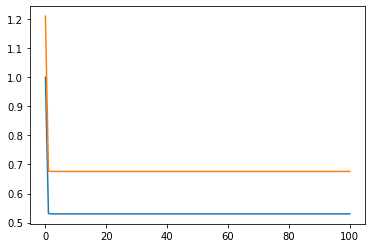

In [22]:
### BEGIN SOLUTION
def MSE(y_,X_,w_):
    return (compute_error(y_, X_, w_)**2).mean()
    
w = np.zeros(1+X_train.shape[1])

MSE_train = [MSE(y_train, X_train, w)]
MSE_test = [MSE(y_test, X_test, w)]

for i in range(100):
    w = update_weights(y_train, X_train, w)
    MSE_train.append(MSE(y_train, X_train, w))
    MSE_test.append(MSE(y_test, X_test, w))
### END SOLUTION

pd.Series(MSE_train).plot()
pd.Series(MSE_test).plot()